# Cepstrum from acoustic vibrations

We are going to work with real data. We will work with some sound recordings that you can collect with no other equipment than your computer. 

The idea is to record two different sounds using the Python library *PortAudio* (https://python-sounddevice.readthedocs.io/en/0.3.12/). We will read these sound files will the library *soundFile* (https://pypi.org/project/SoundFile/). 

After reading the signals, we will find the main frequency of the recording using a Fourier Transform. 

Another common technique used for speech analysis is Cepstrum analysis. For discrete-time signals, the cepstrum is defined as the inverse discrete-time Fourier Transform of the natural logarithm of the discrete-time Fourier Transform of the signal.



In [1]:
# Libraries
import numpy as np
import soundfile as sf
import sounddevice as sd
%matplotlib notebook
import matplotlib.pyplot as plt


In [29]:
class Figure():
    def __init__(self):
        self.figure, self.axes = plt.subplots()
               
    def plot(self, v1, v2=np.asarray([])):
        if v2.size:
            self.axes.plot(v1, v2)
        else:
            self.axes.plot(v1)
        plt.show()
        
    def xlabel(self, txt):
        self.axes.set_xlabel(txt)

Set the record specifications: duration, sampling frequency and number of channels

In [7]:
duration = 3.0 # seconds
fs = 44100 # Htz -> sampling frequency
sd.default.samplerate = fs 
sd.default.channels = 2


First recording. Hit run and start talking. You can record yourself saying "Hello"

In [106]:
myRecording1 = sd.rec(int(duration*fs))
myRecording1 = myRecording1[:,1]

Second recording

In [114]:
myRecording2 = sd.rec(int(duration*fs))
myRecording2 = myRecording2[:,1]

#### Process the first signal
We will first play the recording and plot it to get an idea of where the main pitch is. We will locate the highest peak and locate that point in time. 
After locating this point, we will extract a 20ms segment of the recording. In practice it is common to work with segments no longer than 25ms. The stationary assumptions are met for segments of this length. 

The cepstrum is computed for this 20ms segment as: 

$c[n] = \int_{-1/2}^{1/2}\log{\left|X(f)\right|e^{i2\pi fn}df}$


<IPython.core.display.Javascript object>


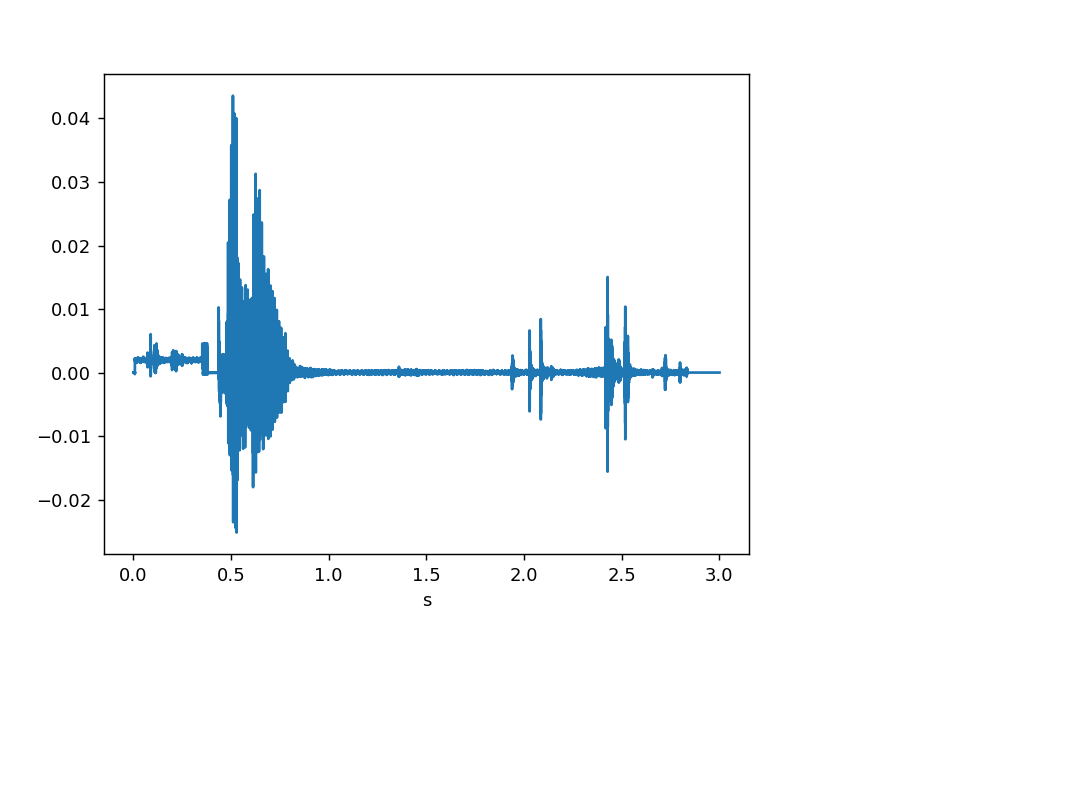

In [141]:
data = myRecording1
time_scale =np.arange(data.shape[0])
seconds = time_scale/fs

# Play recording 1
sd.play(data)

# Plot the sound with time axis in seconds
fig1 =Figure()
fig1.plot(seconds, data)
fig1.xlabel('s')

<IPython.core.display.Javascript object>


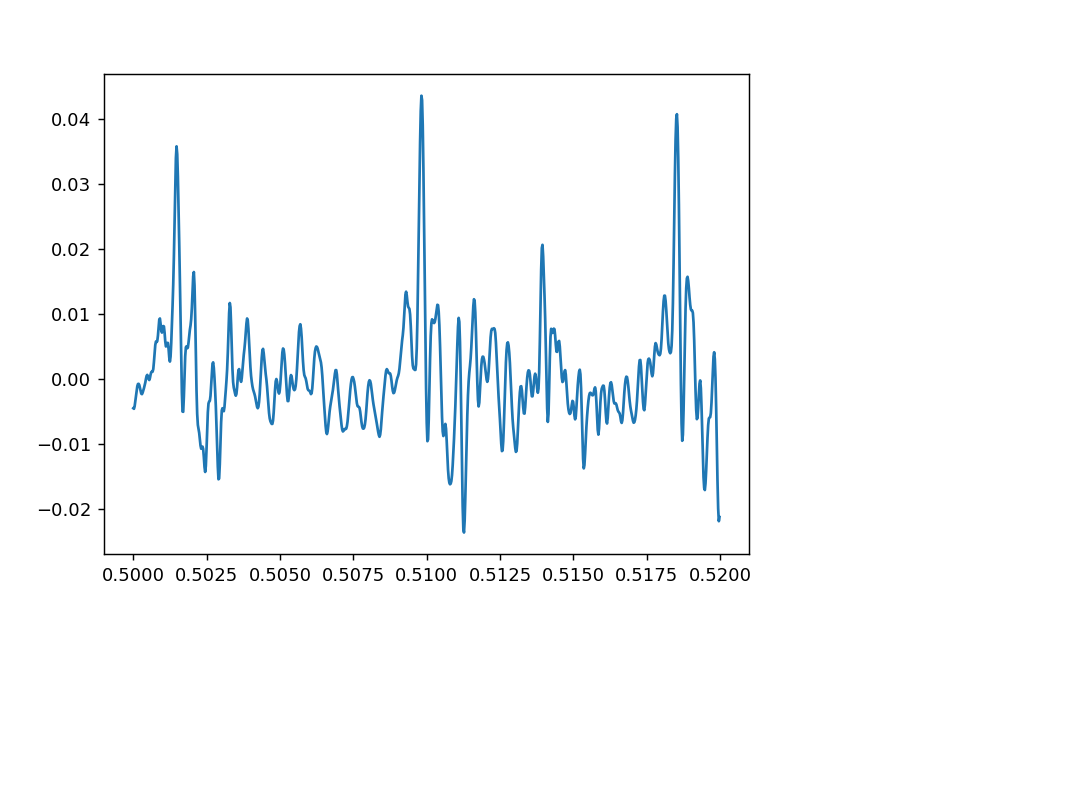

In [142]:
# Find t seconds mark
mark = round(fs*0.5)
sound = data
sample = sound[mark:mark + 882]
smp_secs = seconds[mark:mark + 882]
fig2 = Figure()
fig2.plot(smp_secs, sample)

<IPython.core.display.Javascript object>


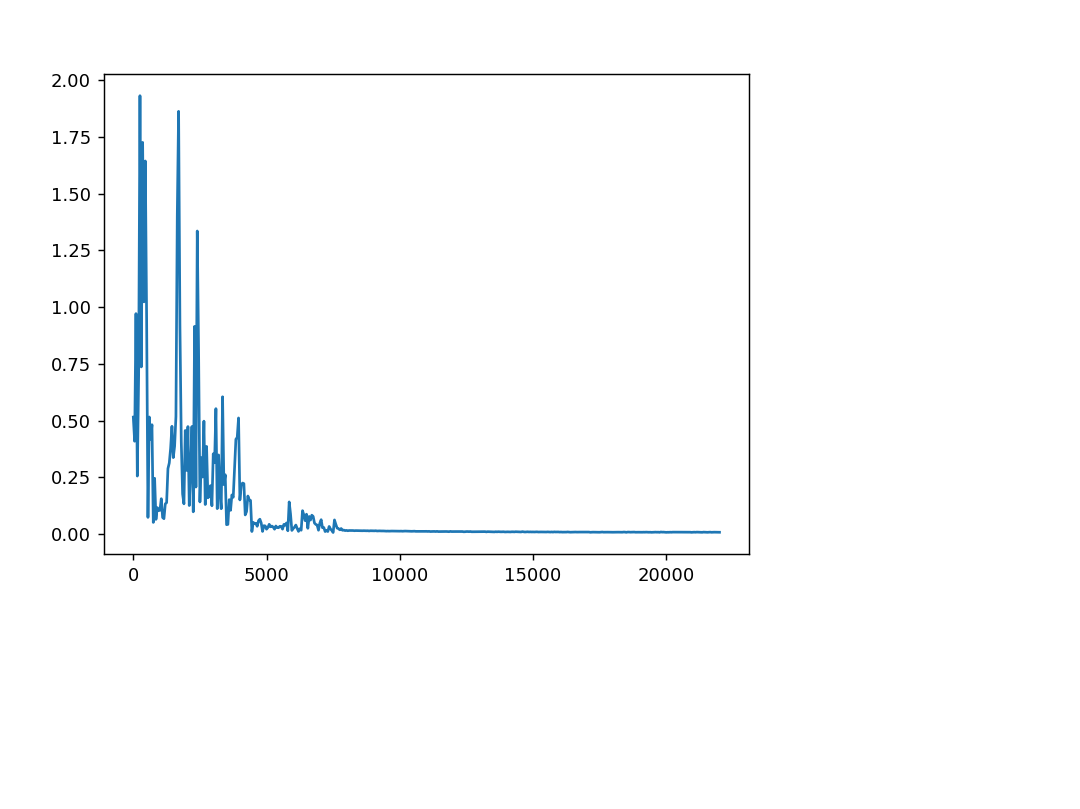

In [143]:
psd = np.absolute(np.fft.fft(sample))
# Scale in 1/s = Hz
timestep = 1/fs
frequencyScale = np.fft.fftfreq(882, timestep)
fig3 = Figure()
fig3.plot(frequencyScale[0:882//2],psd[0:int(882/2)])


<IPython.core.display.Javascript object>


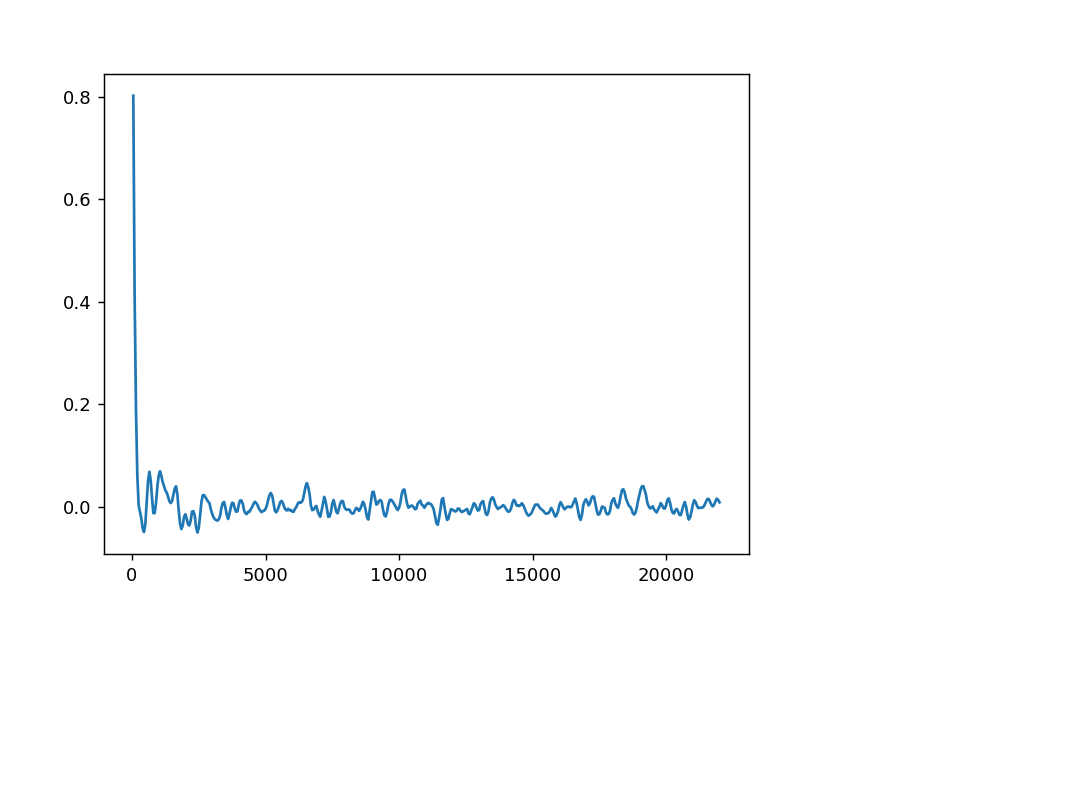

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [144]:
cep1 = np.abs(np.fft.ifft(np.log(np.absolute(psd))))
# Scale in 1/s = Hz
#timestep = 1/fs
#frequencyScale = np.fft.fftfreq(882, timestep)
fig4 = Figure()
#fig3.plot(frequencyScale[0:882//2],psd[0:int(882/2)])
fig4.plot(frequencyScale[1:882//2],cep[1:int(882/2)])

### Second recording

<IPython.core.display.Javascript object>


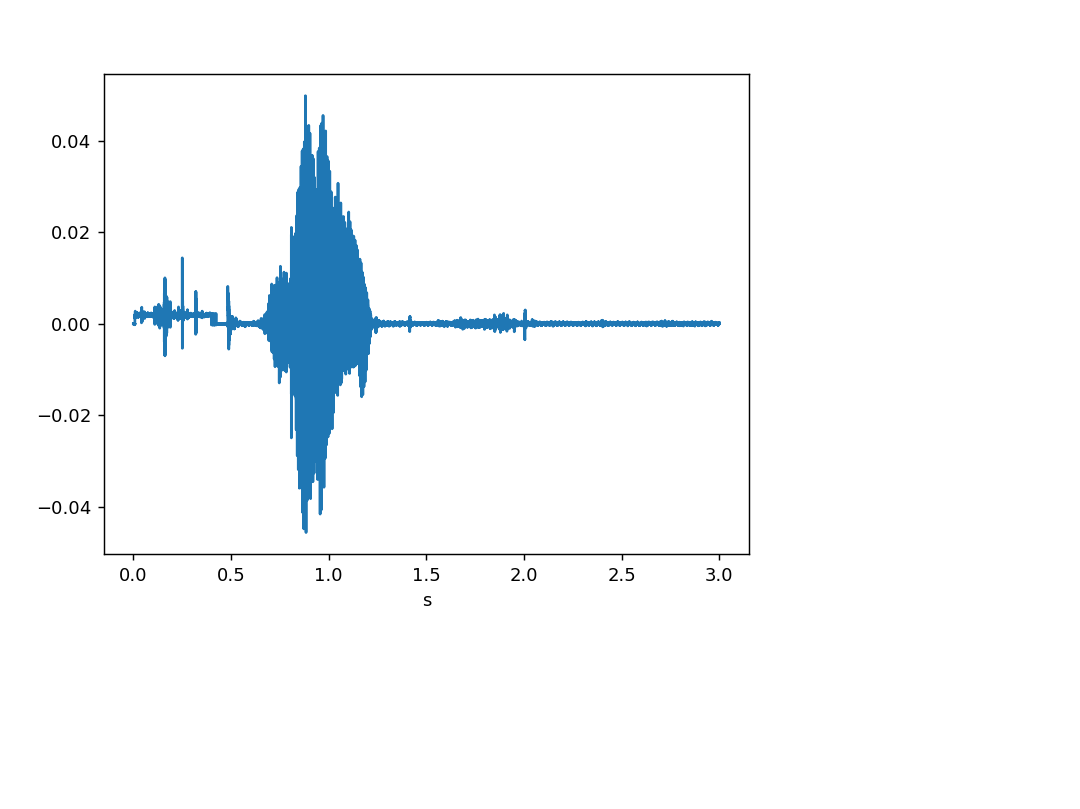

In [129]:
data = myRecording2
time_scale =np.arange(data.shape[0])
seconds = time_scale/fs

# Play recording 2
sd.play(data)

# Plot the sound with time axis in seconds
fig1 =Figure()
fig1.plot(seconds, data)
fig1.xlabel('s')

<IPython.core.display.Javascript object>


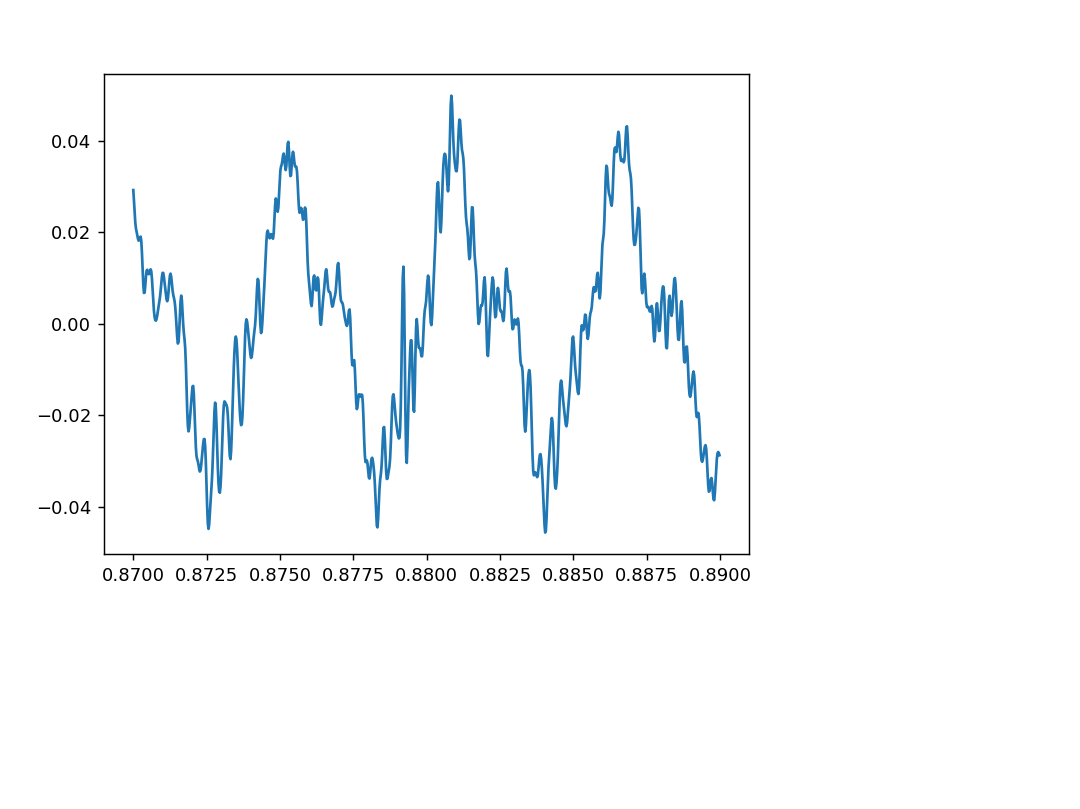

In [130]:
# Find t seconds mark
mark = round(fs*0.87)
sound = data
sample = sound[mark:mark + 882]
smp_secs = seconds[mark:mark + 882]
fig2 = Figure()
fig2.plot(smp_secs, sample)

<IPython.core.display.Javascript object>


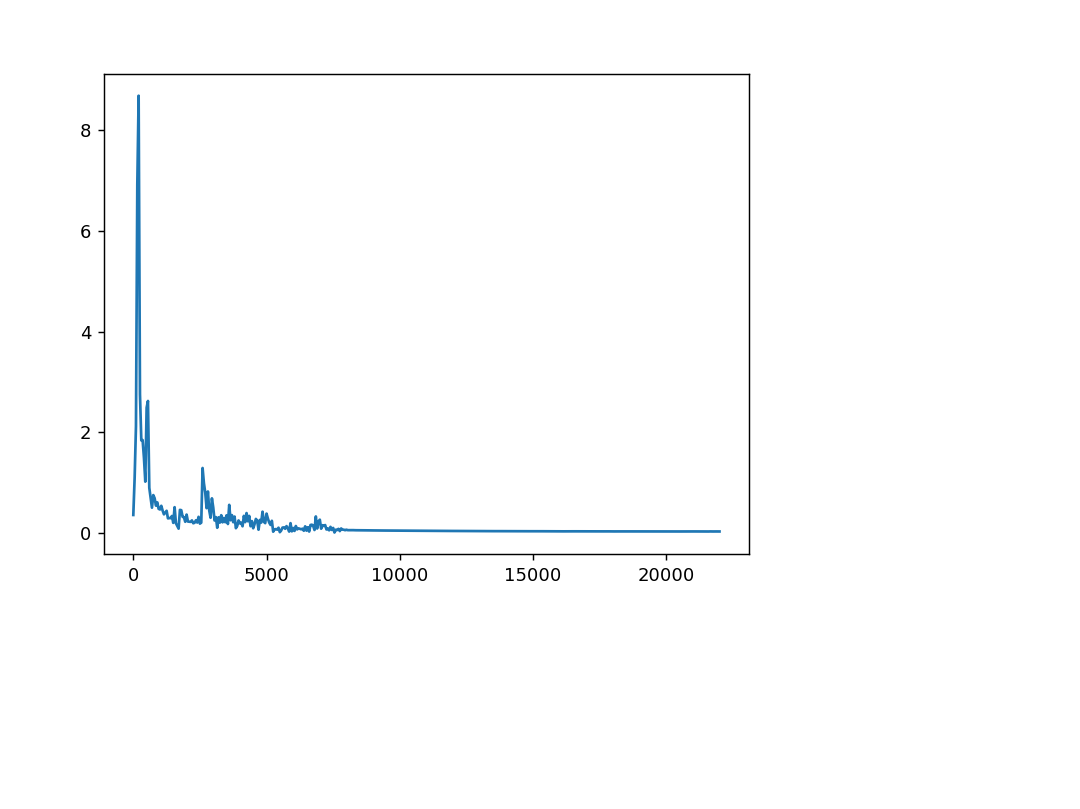

In [131]:
psd = np.absolute(np.fft.fft(sample))
# Scale in 1/s = Hz
timestep = 1/fs
frequencyScale = np.fft.fftfreq(882, timestep)
fig3 = Figure()
fig3.plot(frequencyScale[0:882//2],psd[0:int(882/2)])

<IPython.core.display.Javascript object>


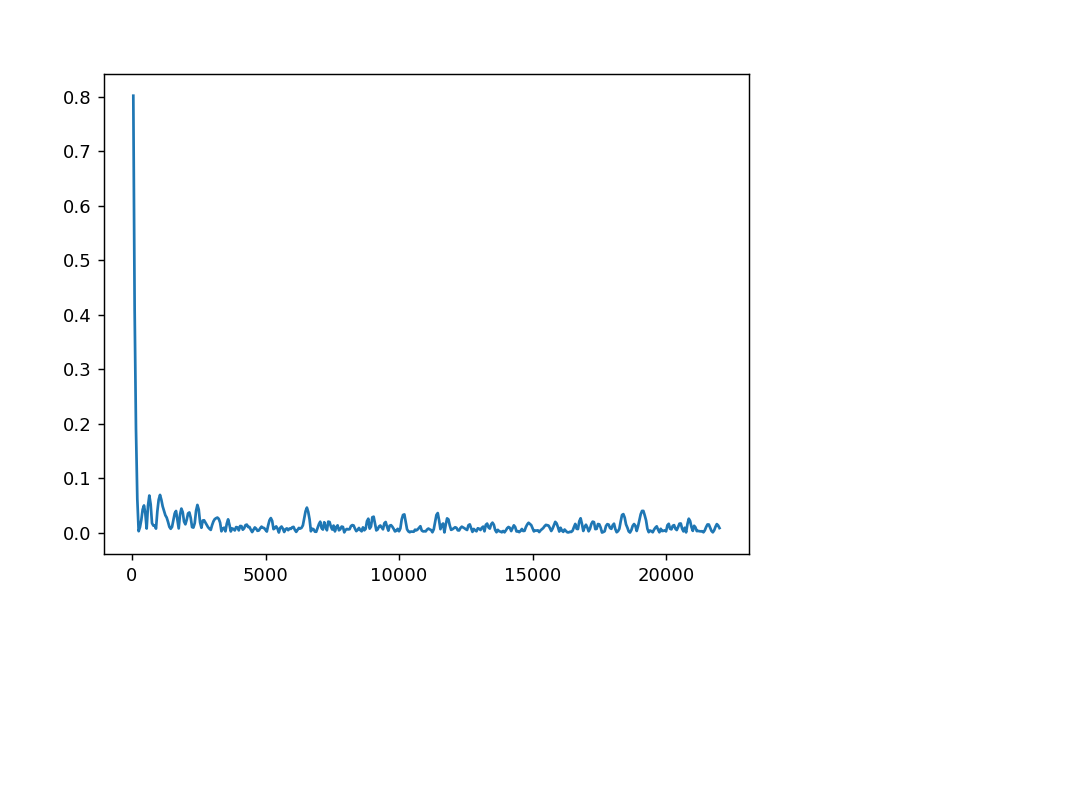

In [152]:
cep2 = np.absolute(np.fft.ifft(np.log(np.absolute(psd))))
# Scale in 1/s = Hz
#timestep = 1/fs
#frequencyScale = np.fft.fftfreq(882, timestep)
fig4 = Figure()
#fig3.plot(frequencyScale[0:882//2],psd[0:int(882/2)])
fig4.plot(frequencyScale[1:882//2],cep2[1:int(882/2)])

<IPython.core.display.Javascript object>


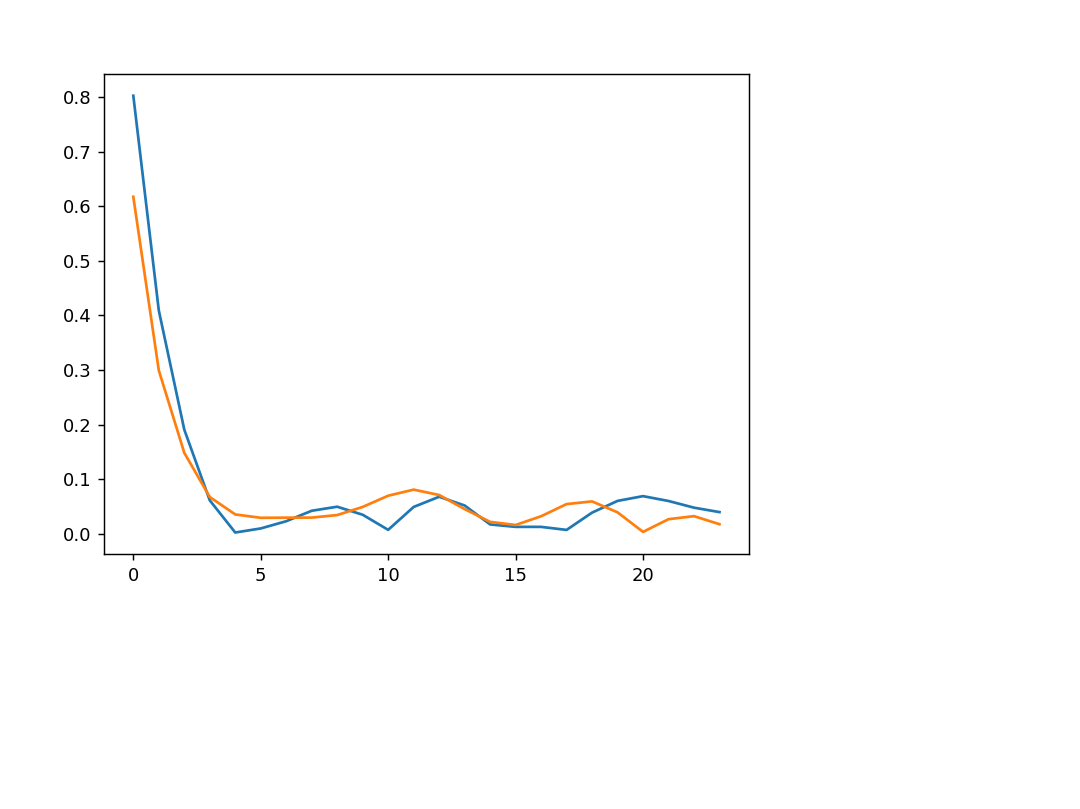

[ 0.80243664  0.40925032  0.19092139  0.06138287  0.00244712  0.00992185
  0.02313782  0.04229904  0.04970391  0.03500043  0.00735006  0.04927512
  0.0679667   0.05195092  0.01725432  0.01279462  0.01279207  0.00721426
  0.0388802   0.06036717  0.06907525  0.0601953   0.04795526  0.03982654]
[ 0.61736455  0.29946019  0.148436    0.06745736  0.03557501  0.02939803
  0.02965929  0.02977012  0.03443523  0.04930523  0.06986096  0.08099933
  0.07114975  0.04535494  0.02194604  0.01621366  0.0322247   0.05452148
  0.05942812  0.03940427  0.00360888  0.02686147  0.03242766  0.01765781]


In [150]:
fig4 = Figure()
fig4.plot(cep1[1:25])
fig4.plot(cep2[1:25])
print(cep1[1:25])
print(cep2[1:25])